# Install Required  Libraries:

In [1]:
#pip install numpy
#pip install pandas
#pip install opencv-python
#pip install tensorflow
#pip install matplotlib
#pip install sklearn
#pip install scipy

-> The main aim of this project is to create a convolutional neural network (CNN) which will predict wheather a brain has tumor or not the man has suffering from a disease or not </br>
-> CNN Classification model is trained, validate, and test with different layers and other hyperparameters.</br>
->CNN is built using TensorFlow and Keras </br>

# Steps to Implement Brain tumor Disease Prediction:

step1: Import required libraries
  
step2: Import the Brain tumor Dataset

step3: Visualize the images and Resize the images

step4: Convert images into Numpy array and do Normalizasion

step5: Visualize the class count and check for class balance or imbalance

step6: Splitting the Dataset into train and test and also validate

step7:  Create model architecture, compile the model and then fit it using training data

step8: Plot accuracy and loss against each epoch

step9: Make predictions on testing data

step10: Visualize the original and predicted labels for the test images

step11: Deploy the Project

# Step1: Import Required Libraries:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
import os
from os import listdir
from PIL import Image
import tensorflow as tf
from keras.preprocessing import image
from tensorflow.keras.utils import img_to_array, array_to_img
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Activation,Flatten, Dropout, Dense, BatchNormalization
from sklearn.model_selection import train_test_split
from keras.models import model_from_json
from keras.utils import to_categorical

# Step2: Import the Brain Tumor Images Dataset:

In [3]:
brain_dataset = "C:/Users/thiru/Tensorflow_ML_DL/Brain Tumor Major Project/brain_tumor_dataset"

non_tumor = os.listdir(os.path.join(brain_dataset, 'non_tumor_images'))
tumor = os.listdir(os.path.join(brain_dataset, 'tumor_images'))

# Step3: Visualize the images and Resize the images

C:\Users\thiru\AppData\Local\Temp\ipykernel_9688\3885797599.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


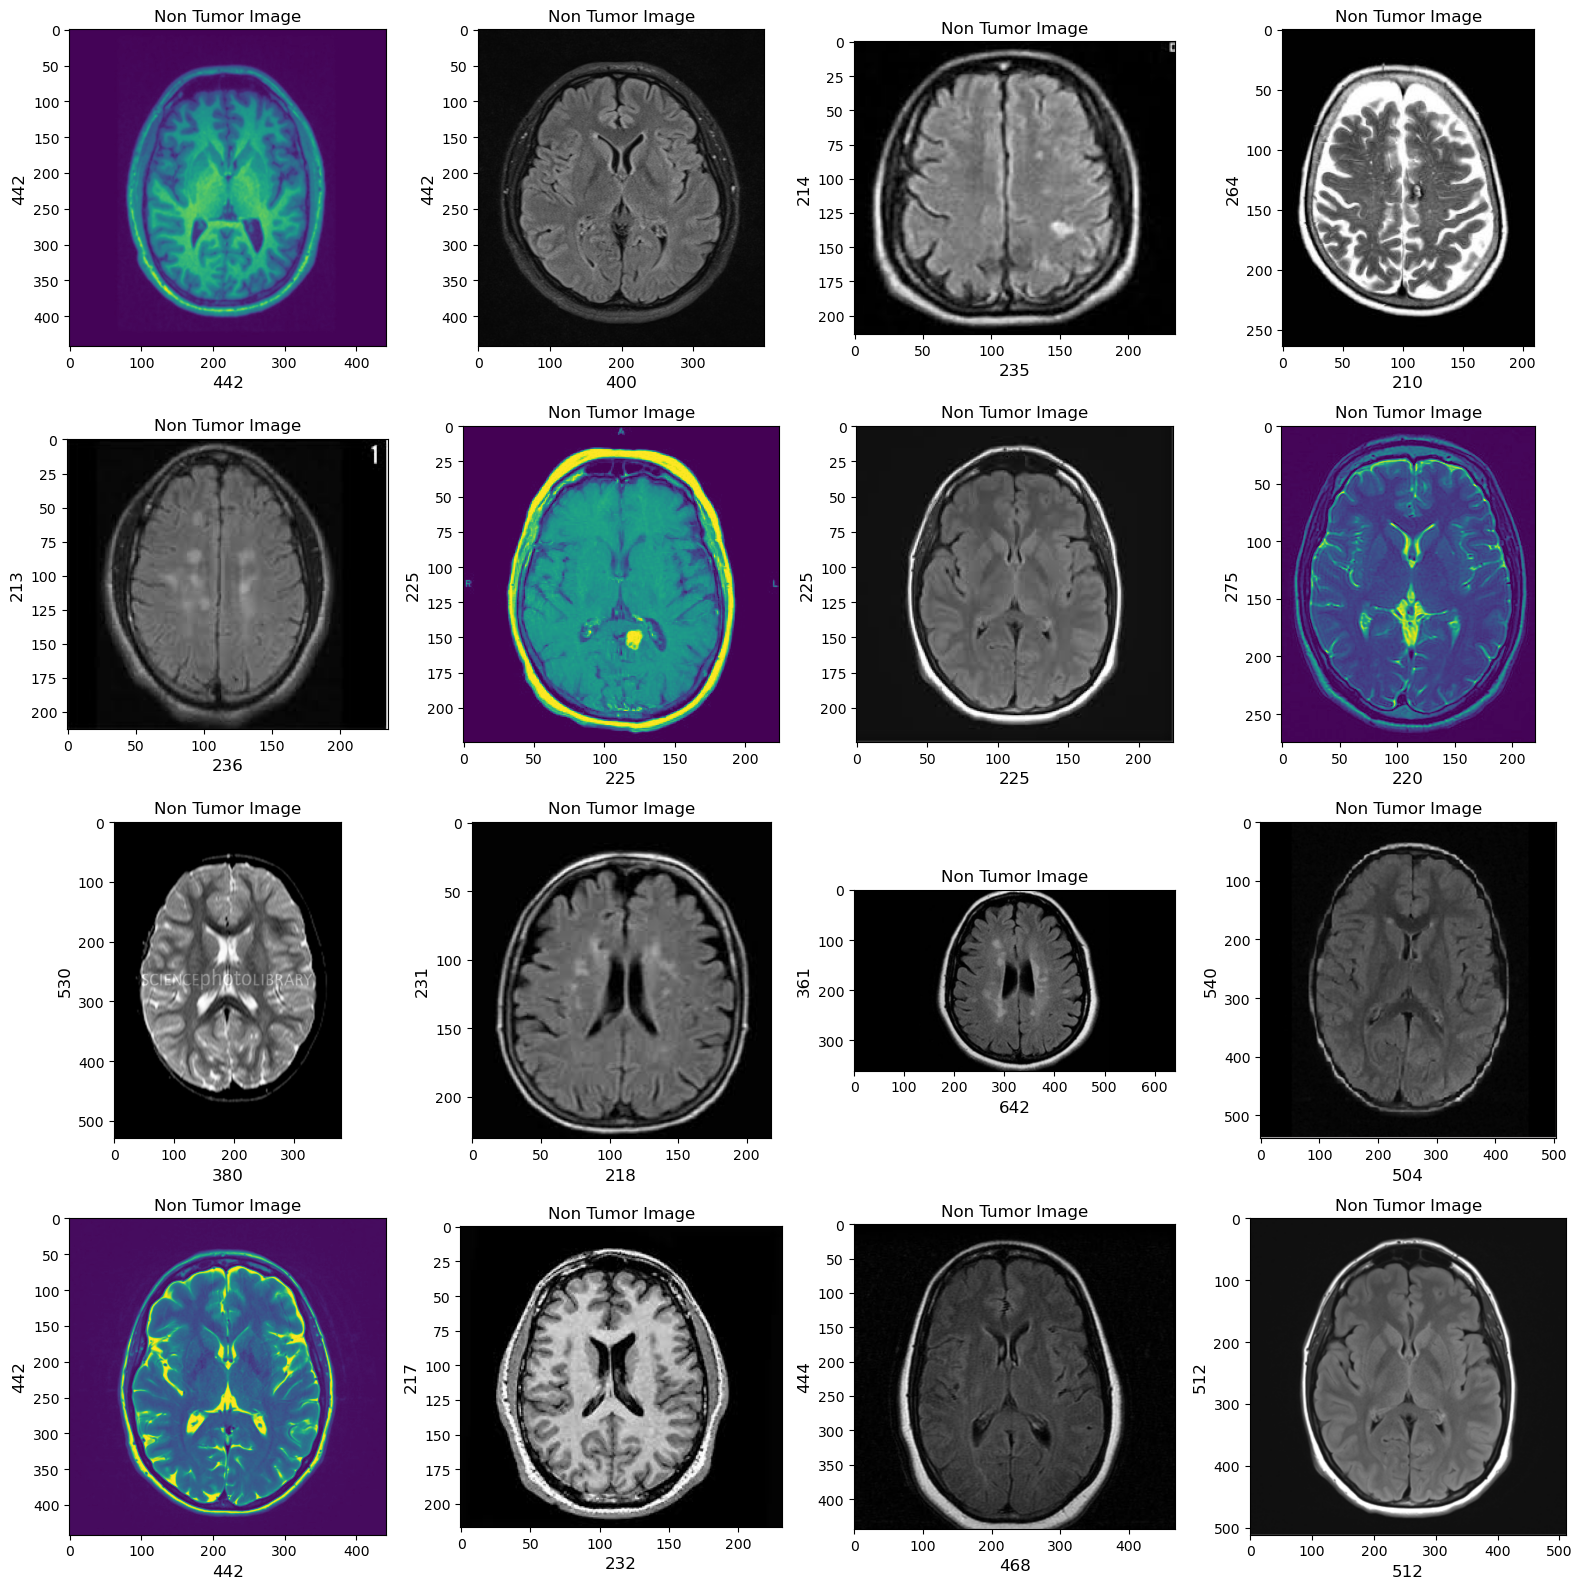

In [4]:
plt.figure(figsize=(16,16))
path_non_tumor_images = os.path.join(brain_dataset, 'non_tumor_images')

for i in range (1,17):
    plt.subplot(4, 4, i)
    plt.tight_layout()
    img = imread(path_non_tumor_images  + '/' + random.choice(sorted(os.listdir(path_non_tumor_images ))))
    plt.imshow(img)
    plt.title('Non Tumor Image')
    plt.xlabel(img.shape[1], fontsize = 12)
    plt.ylabel(img.shape[0], fontsize = 12)

C:\Users\thiru\AppData\Local\Temp\ipykernel_9688\939577778.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


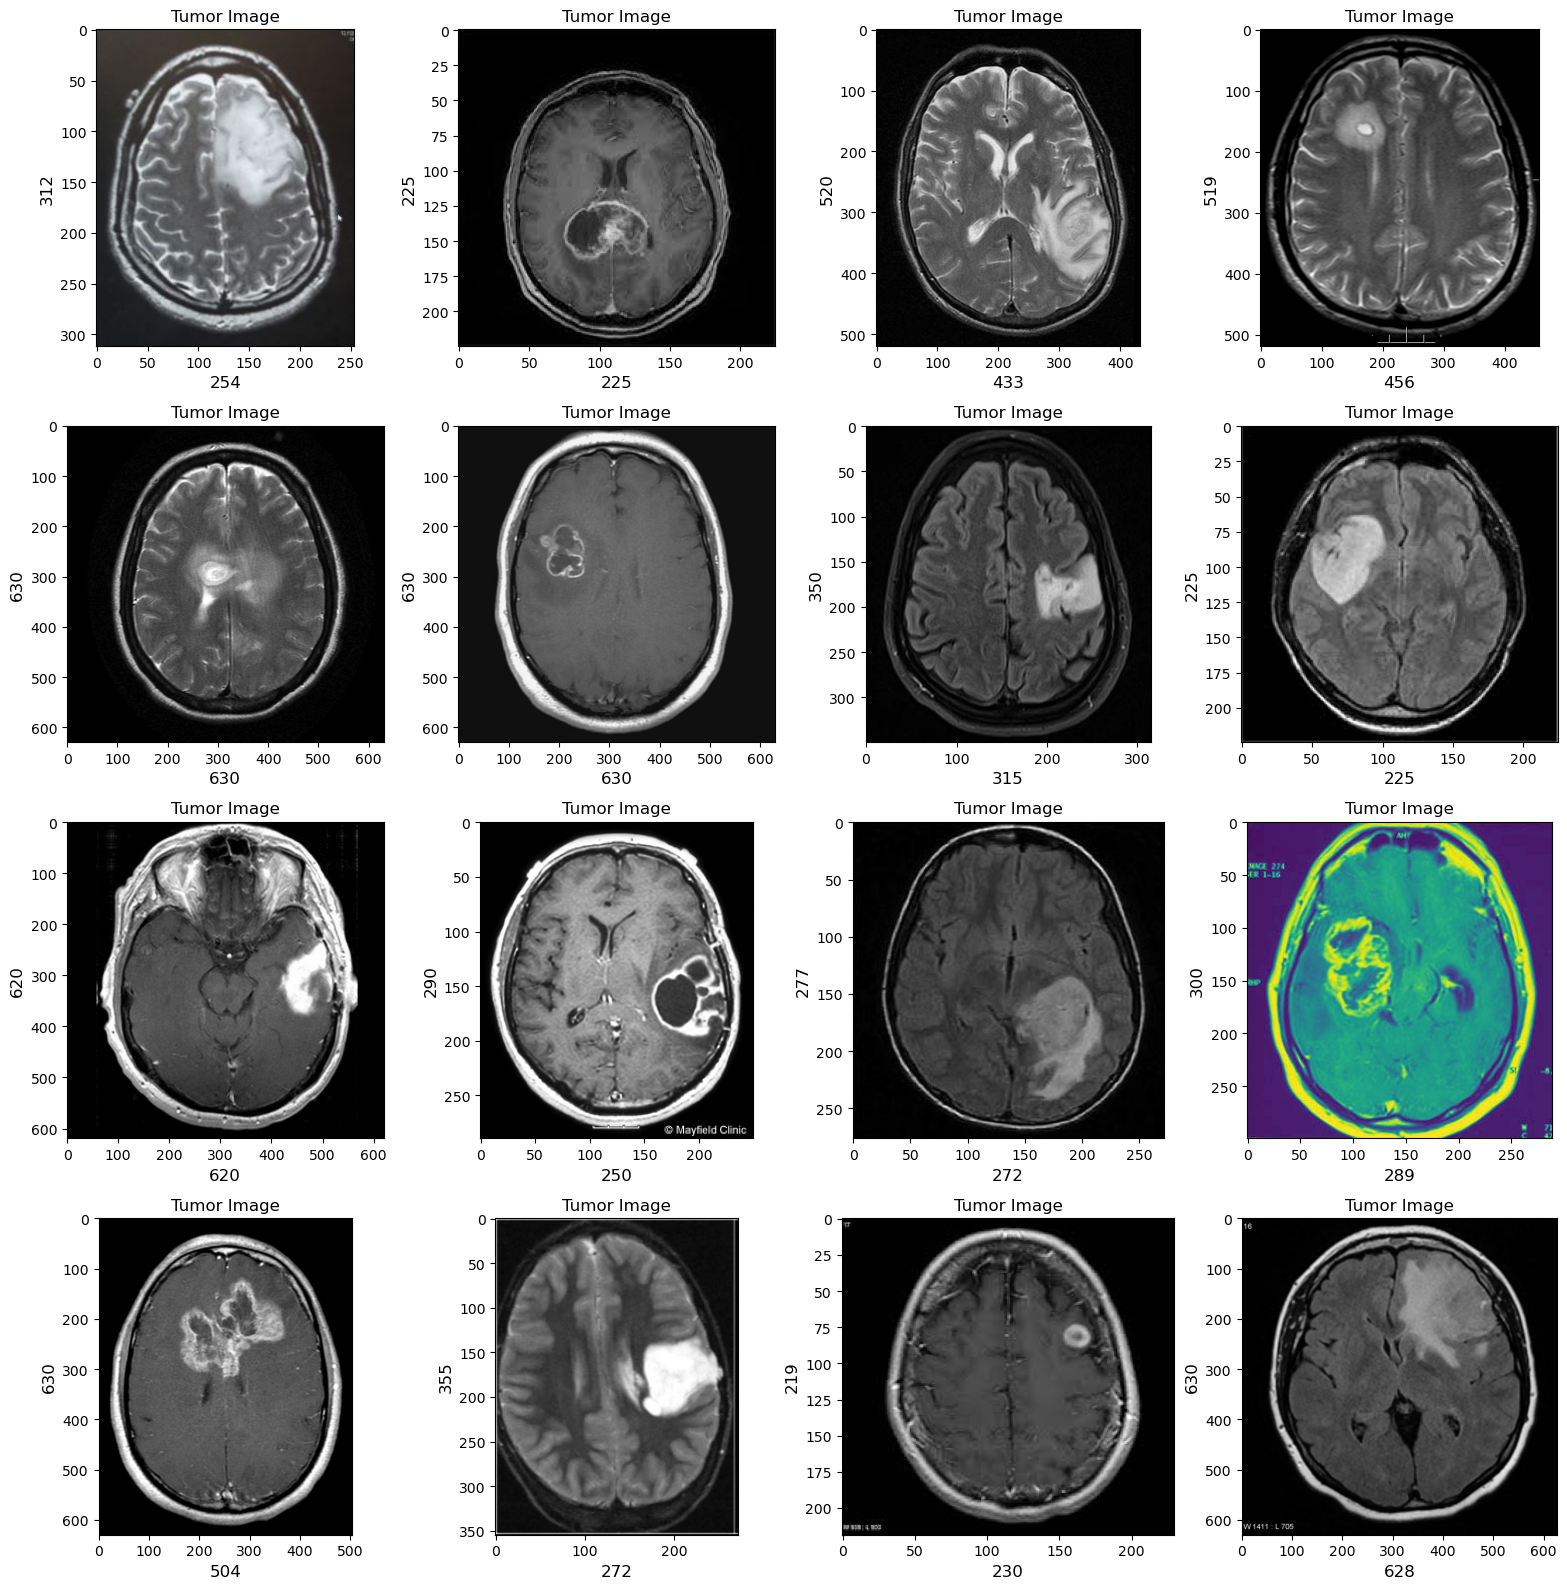

In [5]:
plt.figure(figsize=(16, 16))

path_tumor_images = os.path.join(brain_dataset, "tumor_images")

for j in range(1,17):
    plt.subplot(4,4,j)
    plt.tight_layout()
    img1 = imread(path_tumor_images + '/' + random.choice(os.listdir(path_tumor_images)))
    plt.imshow(img1)
    plt.title('Tumor Image')
    plt.xlabel(img1.shape[1], fontsize=12)
    plt.ylabel(img1.shape[0], fontsize=12)

# Step4: Convert images into Numpy array and do Normalizasion

In [6]:
def convert_image_to_array(image_directory):
    try:
        image = cv2.imread(image_directory)
        if image is not None:
            image = cv2.resize(image, (256, 256))
            return img_to_array(image)
        else: 
            return np.array([])
    except Exception as excep:
        print(f"Error: (excep)")
        return None
        

Reading and converting image to array

In [7]:
directory = brain_dataset
images_list, label_list = [], []
dataset_labels = ['non_tumor_images', 'tumor_images']
binary_labels = [0,1]

temp = -1
for image_directory in ['non_tumor_images', 'tumor_images'] :
    brain_image_list = listdir(f"{directory}/{image_directory}")
    temp += 1
    for files in brain_image_list:
        image_path = f"{directory}/{image_directory}/{files}"
        images_list.append(convert_image_to_array(image_path))
        label_list.append(binary_labels[temp])

In [8]:
#images_list

In [9]:
#label_list

In [10]:
label_list = np.array(label_list)

In [11]:
images_list = np.array(images_list, dtype=np.float16) / 255.0

In [12]:
images_list = images_list.reshape(-1, 256, 256, 3)

# Step5: Visualize the class count and check for class balance or imbalance

In [13]:
labels_counts = pd.DataFrame(label_list).value_counts()
labels_counts.head()

0    98
1    98
Name: count, dtype: int64

In [14]:
images_list[0].shape

(256, 256, 3)

# Step6: Splitting the Dataset into train and test and also validate

In [15]:
x_train,x_test, y_train, y_test = train_test_split(images_list, label_list, test_size=0.2, random_state=10)

In [16]:
#Normalize the dataset of all images
x_train = np.array(x_train, dtype=np.float16)/255.0
x_test = np.array(x_test, dtype=np.float16)/255.0
x_train = x_train.reshape(-1, 256,256,3)
x_test = x_test.reshape(-1,256,256,3)

# Step7: Create model architecture, compile the model and then fit it using training data

# Convolution Neural Network:

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3,3), padding="same",input_shape=(256,256,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Conv2D(16, (3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dense(1, activation= "sigmoid"))
model.summary()

In [17]:
model = Sequential()
model.add(Conv2D(64, (3,3), padding="same",input_shape=(256,256,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, (3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(16, (3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(64, activation="relu"))
model.add(BatchNormalization())
model.add(Dense(1, activation="sigmoid"))

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 64)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 64, 64, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 32, 32, 16)       

# Step8: Plot accuracy and loss against each epoch

While compiling the model we need to set the type of loss which willbe Binary Crossentropy for ourmodel along with this we also to set the optimizer and the metrics respectively

In [18]:
model.compile(loss="binary_crossentropy", optimizer=Adam(learning_rate=0.0001), metrics=["accuracy"])

## training and validation:


In [19]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state = 10)

Fitting the model with the data and finding at each epoch to see how our model is learning

## Training the Model:

In [20]:
epochs = 100
batch_size = 32
history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, validation_data = (x_val, y_val))

Epoch 1/100


4/4 [==============================] - 20s 2s/step - loss: 0.6932 - accuracy: 0.4919 - val_loss: 0.6930 - val_accuracy: 0.6875
Epoch 2/100
4/4 [==============================] - 7s 2s/step - loss: 0.6862 - accuracy: 0.6452 - val_loss: 0.6928 - val_accuracy: 0.5312
Epoch 3/100
4/4 [==============================] - 7s 2s/step - loss: 0.6809 - accuracy: 0.6613 - val_loss: 0.6924 - val_accuracy: 0.5312
Epoch 4/100
4/4 [==============================] - 7s 2s/step - loss: 0.6691 - accuracy: 0.7177 - val_loss: 0.6919 - val_accuracy: 0.6875
Epoch 5/100
4/4 [==============================] - 7s 2s/step - loss: 0.6545 - accuracy: 0.7339 - val_loss: 0.6911 - val_accuracy: 0.5312
Epoch 6/100
4/4 [==============================] - 7s 2s/step - loss: 0.6414 - accuracy: 0.6532 - val_loss: 0.6903 - val_accuracy: 0.5625
Epoch 7/100
4/4 [==============================] - 6s 2s/step - loss: 0.6254 - accuracy: 0.7097 - val_loss: 0.6899 - val_accuracy: 0.6875
Epoch 8/100
4/4 [==============

Epoch 57/100
4/4 [==============================] - 6s 2s/step - loss: 0.1611 - accuracy: 0.9435 - val_loss: 0.6317 - val_accuracy: 0.6250
Epoch 58/100
4/4 [==============================] - 6s 2s/step - loss: 0.1593 - accuracy: 0.9839 - val_loss: 0.6307 - val_accuracy: 0.6562
Epoch 59/100
4/4 [==============================] - 7s 2s/step - loss: 0.1610 - accuracy: 0.9597 - val_loss: 0.6300 - val_accuracy: 0.6562
Epoch 60/100
4/4 [==============================] - 6s 2s/step - loss: 0.1585 - accuracy: 0.9677 - val_loss: 0.6250 - val_accuracy: 0.6250
Epoch 61/100
4/4 [==============================] - 6s 2s/step - loss: 0.1151 - accuracy: 0.9919 - val_loss: 0.6255 - val_accuracy: 0.6250
Epoch 62/100
4/4 [==============================] - 7s 2s/step - loss: 0.1321 - accuracy: 0.9677 - val_loss: 0.6282 - val_accuracy: 0.5938
Epoch 63/100
4/4 [==============================] - 7s 2s/step - loss: 0.1475 - accuracy: 0.9677 - val_loss: 0.6298 - val_accuracy: 0.5938
Epoch 64/100
4/4 [=========

## Save the model

In [ ]:
#model.save("Model/brain_tumor_model.h5")

# Step9: Make predictions on testing data

In [21]:
print("Model Accuracy")
accuracy_score = model.evaluate(x_test, y_test)
print(f"Test Accuracy {accuracy_score[1]*100}")

Model Accuracy
2/2 [==============================] - 1s 144ms/step - loss: 0.5006 - accuracy: 0.8000
Test Accuracy 80.0000011920929


## Make Prdection on Testing data

In [22]:
y_pred = model.predict(x_test)

2/2 [==============================] - 1s 127ms/step


# Step 10: Visualize the original and predicted labels for the test images

C:\Users\thiru\AppData\Local\Temp\ipykernel_9688\4006516810.py:7: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  plt.legend('train', 'val')


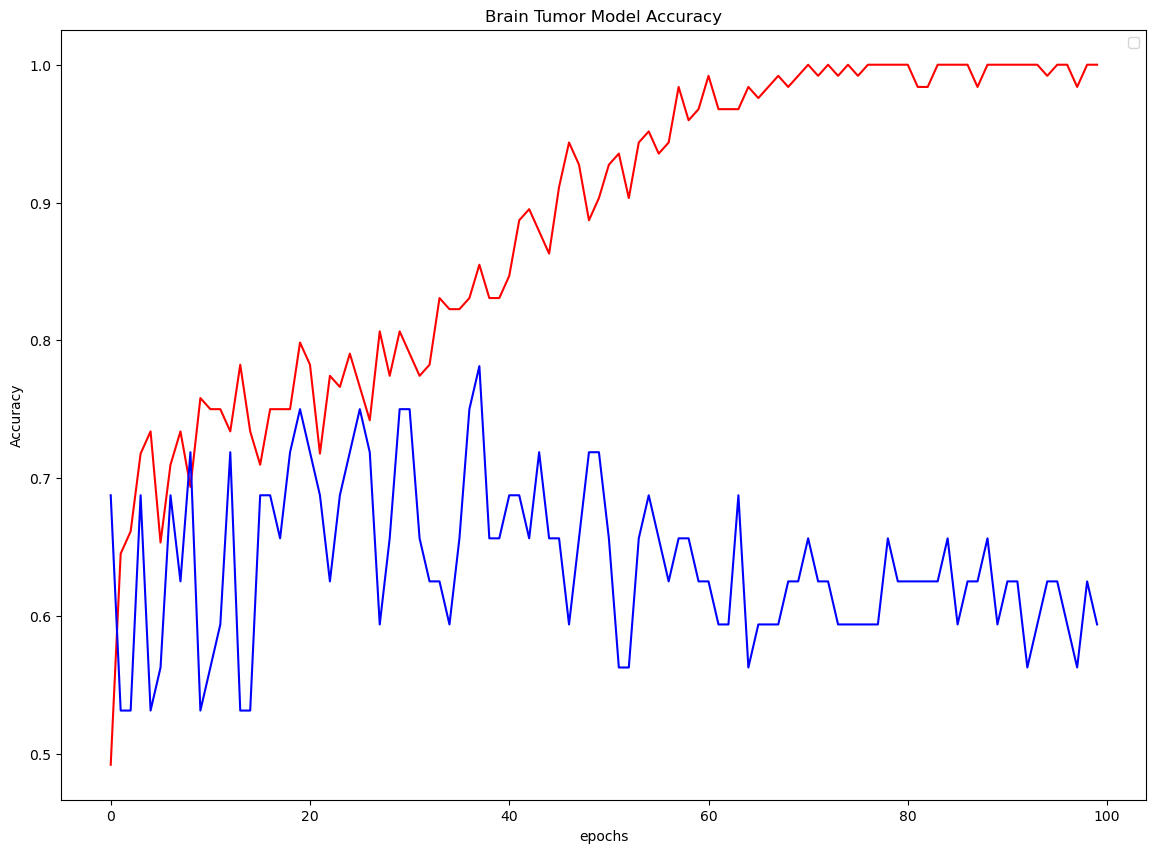

In [23]:
plt.figure(figsize=(14, 10))
plt.plot(history.history['accuracy'],color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Brain Tumor Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend('train', 'val')
plt.show()

# Visualize the original and predicted labels for the testing images

In [ ]:
image11 = array_to_img(x_test[11])

# Step11: Deploy the Project

# Recurrent Neural Network:

In [26]:
from tensorflow.keras.layers import LSTM

model = Sequential()
model.add(LSTM(64, input_shape=(256, 3)))  # Assuming input shape is (256, 3) after reshaping
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 64)                17408     
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 19521 (76.25 KB)
Trainable params: 19521 (76.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
model.compile(loss="binary_crossentropy", optimizer=Adam(learning_rate=0.0001), metrics=["accuracy"])

In [30]:
# Reshape the image data for RNN
x_train_rnn = x_train.reshape(-1, 256, 3)  # Reshape training data
x_val_rnn = x_val.reshape(-1, 256, 3)      # Reshape validation data

In [31]:
print("Shape of x_train_rnn:", x_train_rnn.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of x_val_rnn:", x_val_rnn.shape)
print("Shape of y_val:", y_val.shape)

Shape of x_train_rnn: (31744, 256, 3)
Shape of y_train: (124,)
Shape of x_val_rnn: (8192, 256, 3)
Shape of y_val: (32,)


In [32]:
# Train the RNN model
history = model.fit(x_train_rnn, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val_rnn, y_val))

ValueError: Data cardinality is ambiguous:
  x sizes: 31744
  y sizes: 124
Make sure all arrays contain the same number of samples.

In [28]:
epochs = 60
batch_size = 128

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val))

Epoch 1/60


ValueError: in user code:

    File "C:\Users\thiru\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\thiru\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\thiru\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\thiru\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\thiru\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\thiru\anaconda3\Lib\site-packages\keras\src\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_3" is incompatible with the layer: expected shape=(None, 256, 3), found shape=(None, 256, 256, 3)


In [ ]:
from tensorflow.keras.layers import LSTM

model = Sequential()
model.add(LSTM(64, input_shape=(256, 3)))  # Assuming input shape is (256, 3) after reshaping
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

model.compile(loss="binary_crossentropy", optimizer=Adam(learning_rate=0.0001), metrics=["accuracy"])

epochs = 60
batch_size = 128

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val))
